In [1]:
# Importações
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urljoin
from urllib.error import HTTPError
from wordcloud import wordcloud as WD
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import csv
import ast

In [2]:
# Definição de funções necessárias
def plot_top_barlplot(word_list, escopo, number=20):
    # Contar a frequência de cada palavra
    word_count = Counter(word_list)

    # Selecionar as 10 palavras mais comuns
    common_words = word_count.most_common(number)

    # Separar as palavras e suas frequências
    labels, values = zip(*common_words)

    # Configurar o estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(values), y=list(labels), palette="viridis")

    # Configurar título e labels
    plt.title(f'Top {number} Palavras Mais Usadas {escopo}')
    plt.xlabel('Frequência')
    plt.ylabel('Palavras')

    # Exibir o gráfico
    plt.show()

def plot_wordcloud(word_list):
    # Gerar a nuvem de palavras
    wordcloud = WD.WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))

    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [3]:
# Importa dados
df_final = pd.read_csv('dados/df_final.zip')

# Re-transforma as listas em listas
df_final['title'] = df_final['title'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_final['corpo_texto'] = df_final['corpo_texto'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


display(df_final)

,title,link,date,corpo_texto,noticia_falsa
0,"[ministério, diz, nova, regra, armazenamento, ...",https://g1.globo.com/bemestar/vacina/noticia/2...,28/05/2021 16h10,"[ministério, saúde, informou, nesta, sextafeir...",1.0
1,"[instrução, normativa, instrui, calendário, na...",https://www.gov.br/saude/pt-br/vacinacao/calen...,Data não disponível,"[pdf15, 1, 0, obj, endobj, 2, 0, obj, endobj, ...",NaN
2,"[covid19, riscos, contágio, poderemos, usar, a...",https://noticias.uol.com.br/ultimas-noticias/b...,20/09/2020 08h09,"[passar, aparelho, arcondicionado, comprar, br...",1.0
3,"[relação, vibração, alta, covid19, comprovação...",https://projetocomprova.com.br/publicações/rel...,2020/08/21,"[comprovação, científico, frequência, ânimo, s...",0.0
4,"[chanceler, índia, prevê, decisão, sobre, expo...",https://noticias.uol.com.br/ultimas-noticias/r...,12/01/2021 18h09,"[reuters, índio, decidir, exportação, vacinar,...",1.0
...,...,...,...,...,...
3319,"[número, casos, coronavírus, itália, passa, mil]",https://noticias.uol.com.br/ultimas-noticias/a...,29/02/2020 14h37,"[roma, fev, ansa, passar, caso, coronavírus, s...",1.0
3320,"[porchat, sobre, coronavírus, não, amigos, atl...",https://entretenimento.uol.com.br/noticias/red...,04/04/2020 17h49,"[comediante, fábio, porchat, piar, declaração,...",1.0
3321,"[crm, defende, uso, cloroquina, início, sintom...",https://medicospelavidacovid19.com.br/geral/cr...,Data não disponível,"[crm, defende, uso, cloroquina, início, sintom...",NaN
3322,"[astrazeneca, testa, medicamento, pode, dar, i...",https://noticias.uol.com.br/ultimas-noticias/a...,26/12/2020 17h31Atualizada em 28/12/2020 09h03,"[cientista, reinar, unir, unir, fase, teste, m...",1.0


In [4]:
# Palavras-chave
keywords = ["vacina", "vacinação", "vacinacao", "covid", "pandemia", "corona", "coronavírus", "coronavirus", "quarentena", "sars-cov-2"]
keywords_regex = r"\b(vacina(r|s|ção)?|covid(19)?|pandemia|corona(v[íi]rus)?|quarentena|sars-cov-2)\b"

## Títulos

/tmp/ipykernel_2891291/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


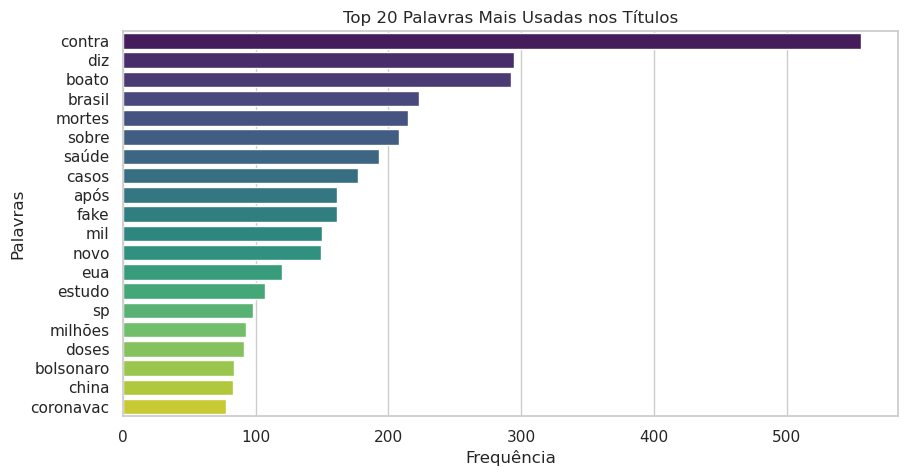

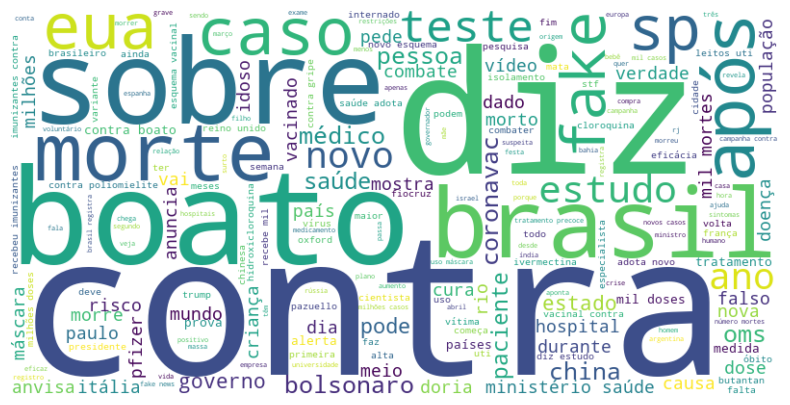

In [5]:
# --------------------------- Palavras mais usadas --------------------------- #
# Reunir todas as palavras de todos os títulos
title_words = [word for title in df_final['title'] for word in title]

# Filtrar as palavras-chave utilizadas na busca (com regex)
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "nos Títulos")
plot_wordcloud(title_words)

/tmp/ipykernel_2891291/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


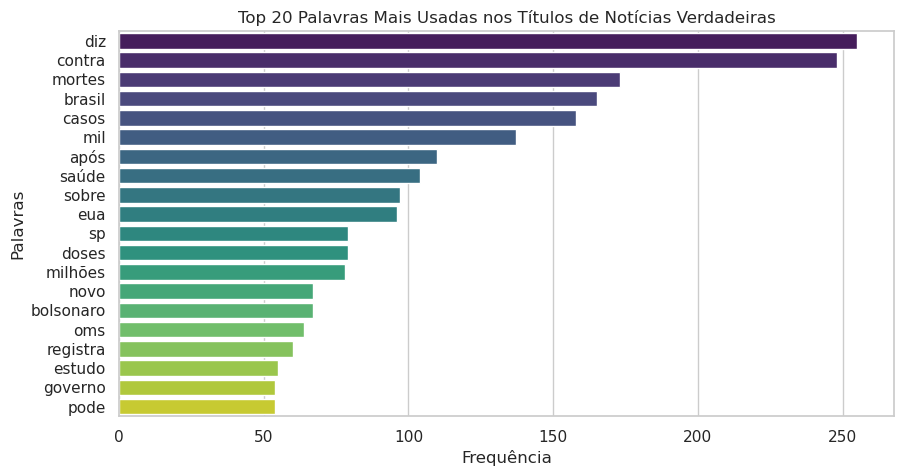

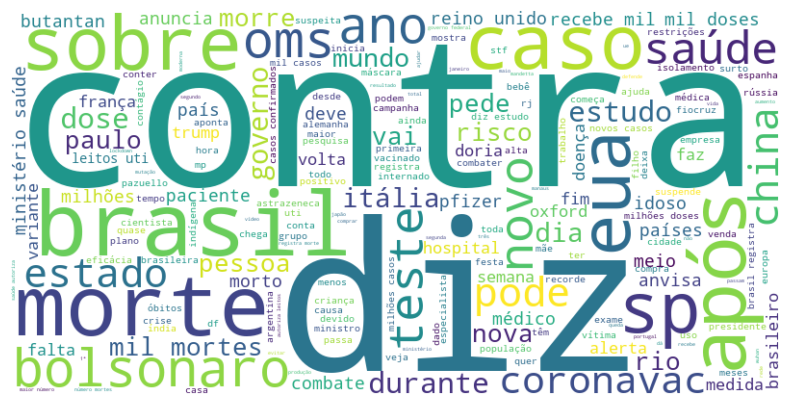

In [6]:
# --------------- Palavras mais usadas nas notícias verdadeiras -------------- #
# Separar notícias verdadeiras
df_true = df_final.loc[df_final['noticia_falsa']==1]

title_words = [word for title in df_true['title'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "nos Títulos de Notícias Verdadeiras")
plot_wordcloud(title_words)

/tmp/ipykernel_2891291/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


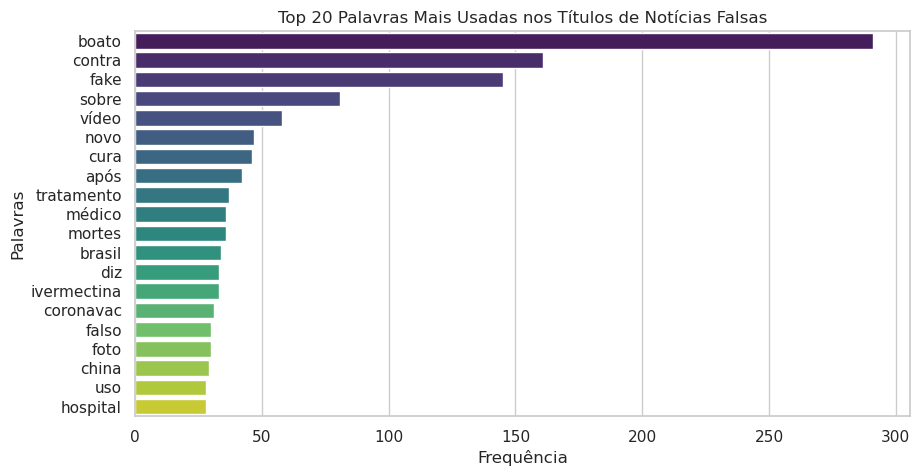

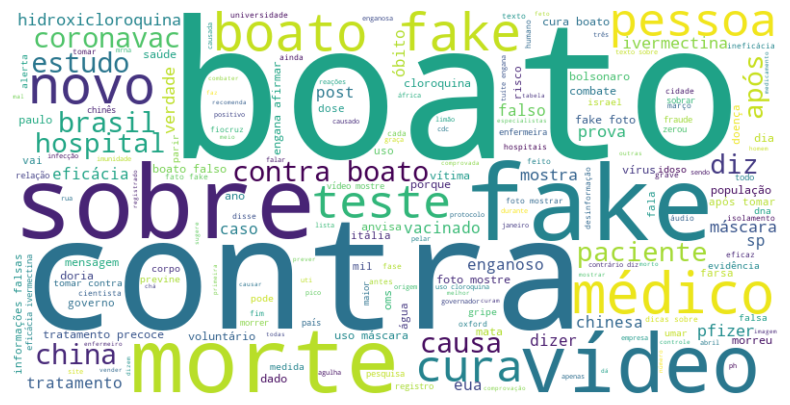

In [7]:
# ----------------- Palavras mais usadas nas notícias falsas ----------------- #
# Separar notícias falsas
df_false = df_final.loc[df_final['noticia_falsa']==0]

title_words = [word for title in df_false['title'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, 'nos Títulos de Notícias Falsas')
plot_wordcloud(title_words)

## Corpo do Texto

/tmp/ipykernel_2891291/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


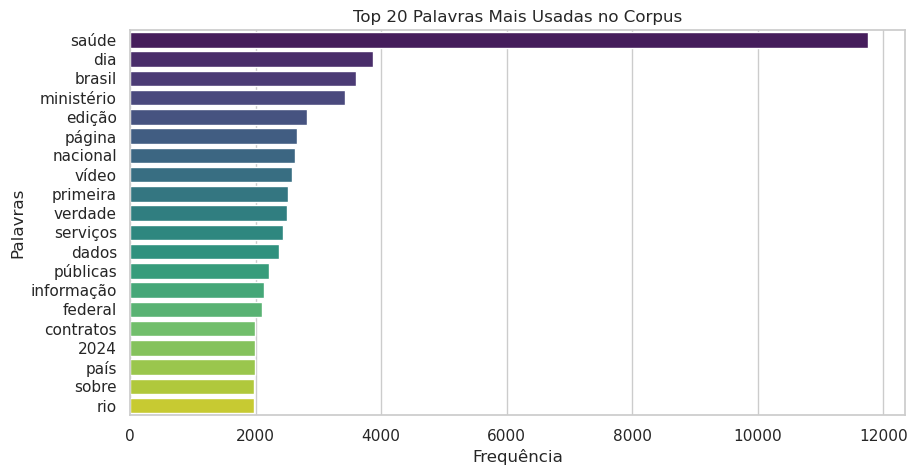

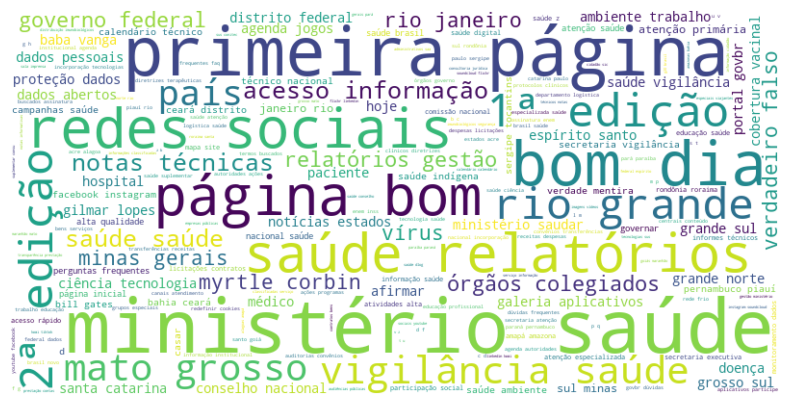

In [8]:
# --------------------------- Palavras mais usadas --------------------------- #
# Reunir todas as palavras do corpo de todos os textos
title_words = [word for title in df_final['corpo_texto'] for word in title]

# Filtrar as palavras-chave utilizadas na busca (com regex)
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "no Corpus")
plot_wordcloud(title_words)

/tmp/ipykernel_2891291/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


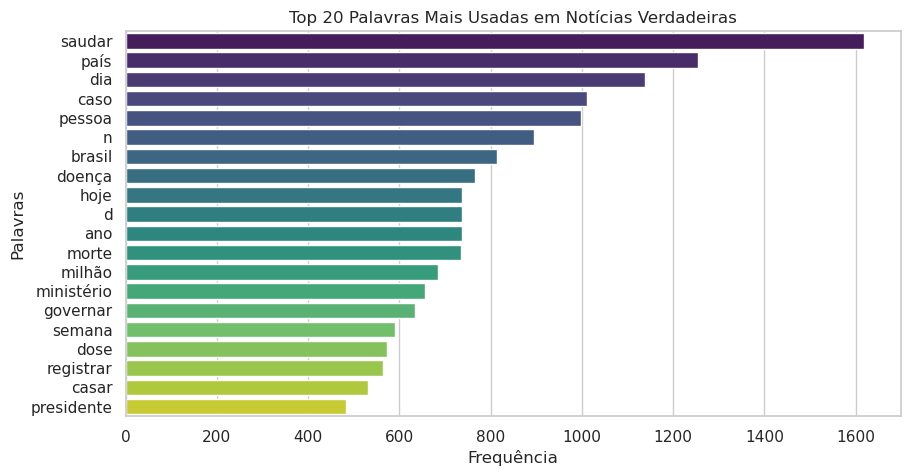

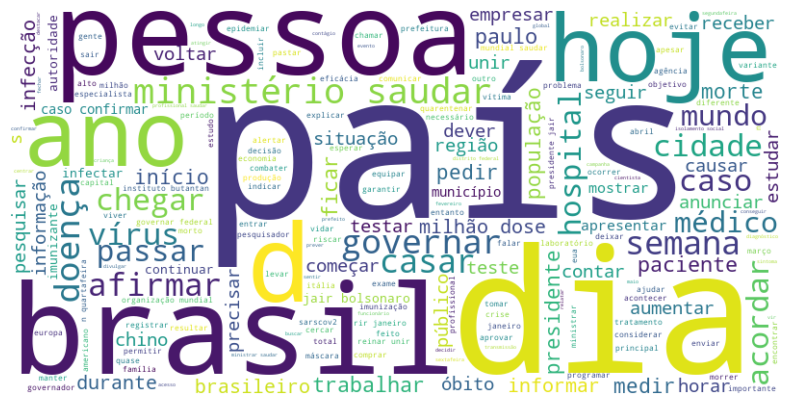

In [9]:
# --------------- Palavras mais usadas nas notícias verdadeiras -------------- #
# Separar notícias verdadeiras
df_true = df_final.loc[df_final['noticia_falsa']==1]

title_words = [word for title in df_true['corpo_texto'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "em Notícias Verdadeiras")
plot_wordcloud(title_words)

/tmp/ipykernel_2891291/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


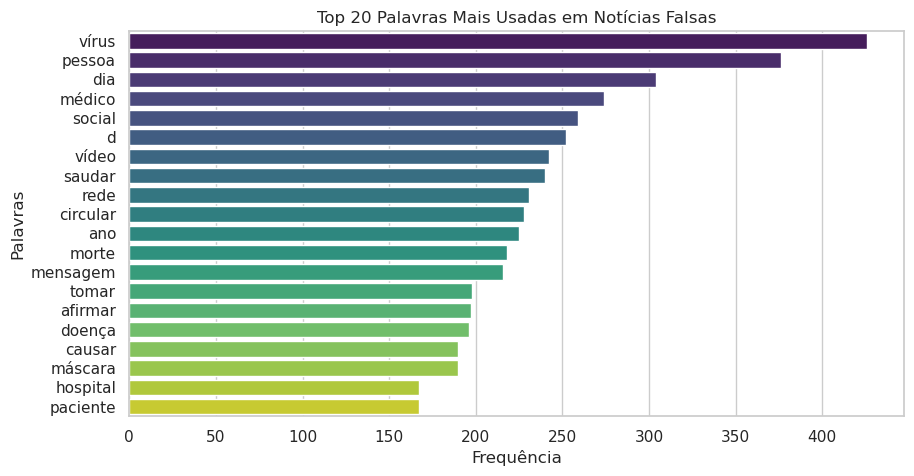

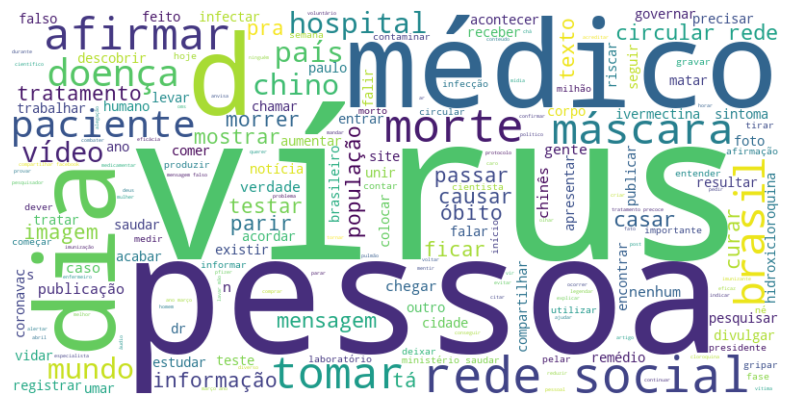

In [10]:
# ----------------- Palavras mais usadas nas notícias falsas ----------------- #
# Separar notícias falsas
df_false = df_final.loc[df_final['noticia_falsa']==0]

title_words = [word for title in df_false['corpo_texto'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, 'em Notícias Falsas')
plot_wordcloud(title_words)